# Loading modules

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats

# Data

In [142]:
ddf = pd.read_csv('day.csv')

In [143]:
ddf

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [144]:
hdf_raw = pd.read_csv('hour.csv', index_col = 0)

In [145]:
hdf_raw

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
instant                                                                   
1        2011-01-01       1   0     1   0        0        6           0   
2        2011-01-01       1   0     1   1        0        6           0   
3        2011-01-01       1   0     1   2        0        6           0   
4        2011-01-01       1   0     1   3        0        6           0   
5        2011-01-01       1   0     1   4        0        6           0   
...             ...     ...  ..   ...  ..      ...      ...         ...   
17375    2012-12-31       1   1    12  19        0        1           1   
17376    2012-12-31       1   1    12  20        0        1           1   
17377    2012-12-31       1   1    12  21        0        1           1   
17378    2012-12-31       1   1    12  22        0        1           1   
17379    2012-12-31       1   1    12  23        0        1           1   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81     0.0000       3          13   16  
2                 1  0.22  0.2727  0.80     0.0000       8          32   40  
3                 1  0.22  0.2727  0.80     0.0000       5          27   32  
4                 1  0.24  0.2879  0.75     0.0000       3          10   13  
5                 1  0.24  0.2879  0.75     0.0000       0           1    1  
...             ...   ...     ...   ...        ...     ...         ...  ...  
17375             2  0.26  0.2576  0.60     0.1642      11         108  119  
17376             2  0.26  0.2576  0.60     0.1642       8          81   89  
17377             1  0.26  0.2576  0.60     0.1642       7          83   90  
17378             1  0.26  0.2727  0.56     0.1343      13          48   61  
17379             1  0.26  0.2727  0.65     0.1343      12          37   49  

[17379 rows x 16 columns]

# Preprocessing Hour DF

In [146]:
hdf_raw.loc[hdf_raw['holiday'] == 0, 'is_holiday'] = 'No'

hdf_raw.loc[hdf_raw['holiday'] == 1, 'is_holiday'] = 'Yes'

In [147]:
hdf_raw.loc[hdf_raw['season'] == 1, 'season'] = 'Winter'
hdf_raw.loc[hdf_raw['season'] == 2, 'season'] = 'Spring'
hdf_raw.loc[hdf_raw['season'] == 3, 'season'] = 'Summer'
hdf_raw.loc[hdf_raw['season'] == 4, 'season'] = 'Fall'

In [148]:
hdf = hdf_raw.rename(columns={"hr": "hour", "cnt": "total_count", "hum": "humidity", "dteday": "date", "yr": "year", "mnth": "month",   })   

In [149]:
hdf.dtypes

date            object
season          object
year             int64
month            int64
hour             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
total_count      int64
is_holiday      object
dtype: object

In [150]:
pd.to_datetime(hdf.date)

instant
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
5       2011-01-01
           ...    
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
17379   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [151]:
hdf.temp = hdf.temp*47 - 8

In [152]:
hdf.loc[hdf['temp'] <= 0, 'tmp_lvl']  = 'cold'

In [153]:
hdf.loc[((hdf['temp'] > 0) & (hdf['temp'] <= 10) ), 'tmp_lvl']  = 'low'

In [154]:
hdf.loc[(( hdf['temp'] > 10) & (hdf['temp'] <= 20) ), 'tmp_lvl']  = 'medium'

In [155]:
hdf.loc[ ((hdf['temp'] > 20) & (hdf['temp'] <= 30)), 'tmp_lvl']  = 'warm'

In [156]:
hdf.loc[hdf['temp'] > 30, 'tmp_lvl']  = 'hot'

In [157]:
hdf.tmp_lvl.value_counts()

warm      5801
low       5252
medium    5056
hot        709
cold       561
Name: tmp_lvl, dtype: int64

In [158]:
q1 = hdf.total_count.quantile(0.25)
q3 = hdf.total_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
hdf = hdf.loc[(hdf.total_count >= lower_bound) & (hdf.total_count <= upper_bound)]

In [159]:
iqr

241.0

# Preprocessing Day DF

In [160]:
ddf.loc[ddf['holiday'] == 0, 'is_holiday'] = 'No'

ddf.loc[ddf['holiday'] == 1, 'is_holiday'] = 'Yes'

In [161]:
hdf_raw.loc[hdf_raw['season'] == 1, 'season'] = 'Winter'
hdf_raw.loc[hdf_raw['season'] == 2, 'season'] = 'Spring'
hdf_raw.loc[hdf_raw['season'] == 3, 'season'] = 'Summer'
hdf_raw.loc[hdf_raw['season'] == 4, 'season'] = 'Fall'

In [162]:
ddf = ddf.rename(columns={"hr": "hour", "cnt": "total_count", "hum": "humidity", "dteday": "date", "yr": "year", "mnth": "month",   })   

In [163]:
ddf.dtypes

instant          int64
date            object
season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
total_count      int64
is_holiday      object
dtype: object

In [164]:
pd.to_datetime(ddf.date)

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: date, Length: 731, dtype: datetime64[ns]

In [165]:
ddf.loc[ddf['temp'] <= 0, 'tmp_lvl']  = 'cold'

In [166]:
ddf.loc[ddf['temp'] <= 10, 'tmp_lvl']  = 'low'

In [167]:
ddf.loc[(ddf['temp'] < 20) & ( ddf['temp'] > 10), 'tmp_lvl']  = 'medium'

In [168]:
ddf.loc[ddf['temp'] < 30, 'tmp_lvl']  = 'warm'

In [169]:
ddf.loc[ddf['temp'] >= 30, 'tmp_lvl']  = 'hot'

In [170]:
ddf

instant        date  season  year  month  holiday  weekday  workingday  \
0          1  2011-01-01       1     0      1        0        6           0   
1          2  2011-01-02       1     0      1        0        0           0   
2          3  2011-01-03       1     0      1        0        1           1   
3          4  2011-01-04       1     0      1        0        2           1   
4          5  2011-01-05       1     0      1        0        3           1   
..       ...         ...     ...   ...    ...      ...      ...         ...   
726      727  2012-12-27       1     1     12        0        4           1   
727      728  2012-12-28       1     1     12        0        5           1   
728      729  2012-12-29       1     1     12        0        6           0   
729      730  2012-12-30       1     1     12        0        0           0   
730      731  2012-12-31       1     1     12        0        1           1   

     weathersit      temp     atemp  humidity  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

     total_count is_holiday tmp_lvl  
0            985         No    warm  
1            801         No    warm  
2           1349         No    warm  
3           1562         No    warm  
4           1600         No    warm  
..           ...        ...     ...  
726         2114         No    warm  
727         3095         No    warm  
728         1341         No    warm  
729         1796         No    warm  
730         2729         No    warm  

[731 rows x 18 columns]

# Visualisation

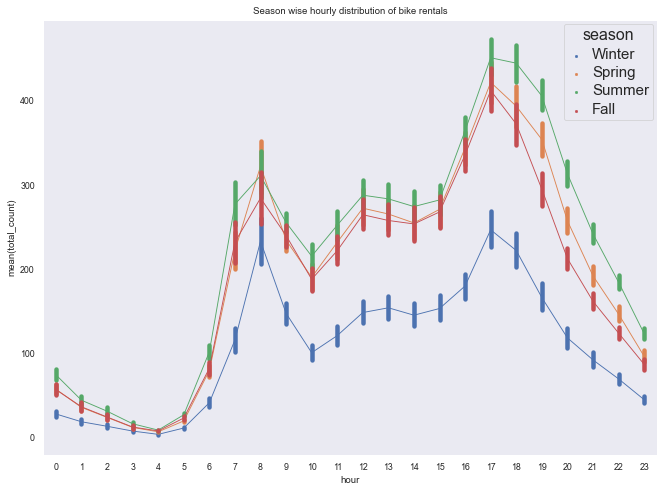

In [171]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hdf[['hour','total_count','season']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals',ylabel= 'mean(total_count)');

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



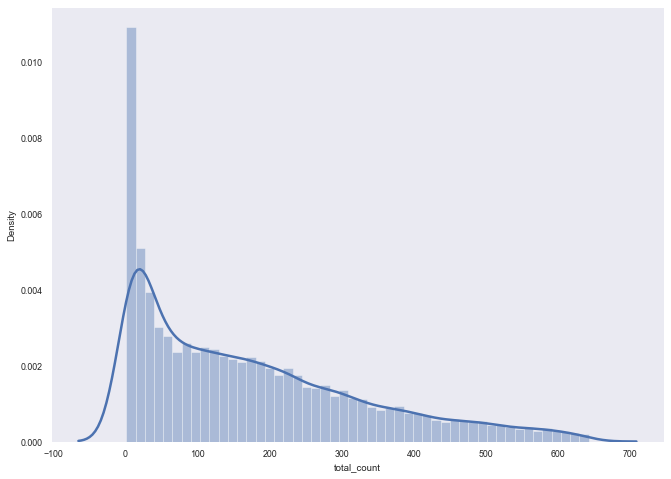

In [172]:
sns.distplot(hdf.total_count, bins = 50);


In [173]:
hdf = hdf[np.abs(hdf["total_count"] - hdf["total_count"].mean()) <= 3*hdf["total_count"].std()]


In [174]:
hdf

date  season  year  month  hour  holiday  weekday  workingday  \
instant                                                                        
1        2011-01-01  Winter     0      1     0        0        6           0   
2        2011-01-01  Winter     0      1     1        0        6           0   
3        2011-01-01  Winter     0      1     2        0        6           0   
4        2011-01-01  Winter     0      1     3        0        6           0   
5        2011-01-01  Winter     0      1     4        0        6           0   
...             ...     ...   ...    ...   ...      ...      ...         ...   
17375    2012-12-31  Winter     1     12    19        0        1           1   
17376    2012-12-31  Winter     1     12    20        0        1           1   
17377    2012-12-31  Winter     1     12    21        0        1           1   
17378    2012-12-31  Winter     1     12    22        0        1           1   
17379    2012-12-31  Winter     1     12    23        0        1           1   

         weathersit  temp   atemp  humidity  windspeed  casual  registered  \
instant                                                                      
1                 1  3.28  0.2879      0.81     0.0000       3          13   
2                 1  2.34  0.2727      0.80     0.0000       8          32   
3                 1  2.34  0.2727      0.80     0.0000       5          27   
4                 1  3.28  0.2879      0.75     0.0000       3          10   
5                 1  3.28  0.2879      0.75     0.0000       0           1   
...             ...   ...     ...       ...        ...     ...         ...   
17375             2  4.22  0.2576      0.60     0.1642      11         108   
17376             2  4.22  0.2576      0.60     0.1642       8          81   
17377             1  4.22  0.2576      0.60     0.1642       7          83   
17378             1  4.22  0.2727      0.56     0.1343      13          48   
17379             1  4.22  0.2727      0.65     0.1343      12          37   

         total_count is_holiday tmp_lvl  
instant                                  
1                 16         No     low  
2                 40         No     low  
3                 32         No     low  
4                 13         No     low  
5                  1         No     low  
...              ...        ...     ...  
17375            119         No     low  
17376             89         No     low  
17377             90         No     low  
17378             61         No     low  
17379             49         No     low  

[16852 rows x 18 columns]

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



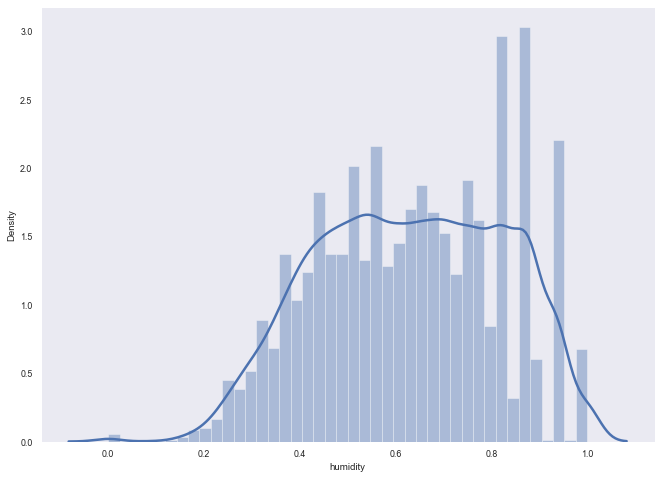

In [175]:
sns.distplot(hdf.humidity);

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



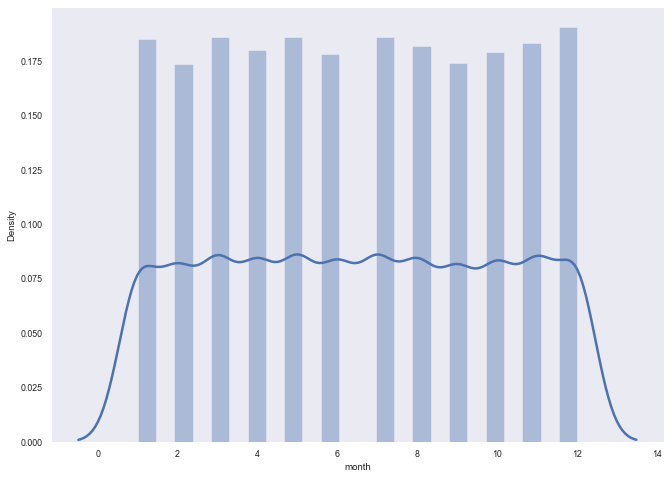

In [176]:
sns.distplot(hdf.month);

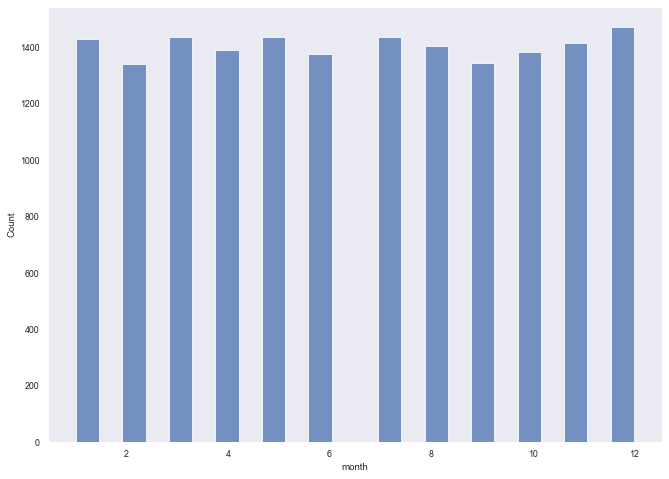

In [177]:
sns.histplot(hdf.month);

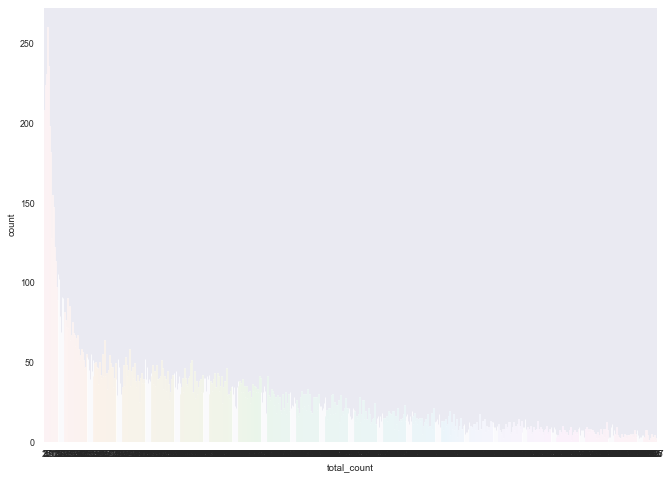

In [178]:
sns.countplot(x="total_count", data=hdf );

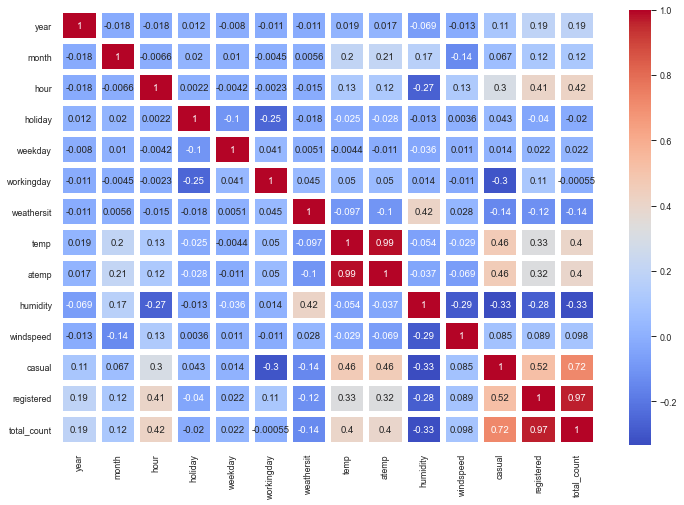

In [179]:
corr = hdf.corr()
plt.figure(figsize = (12,8))

sns.heatmap(corr, linewidth = 5, cmap = "coolwarm", annot = True );

The demand for bike sharing correlates positively with:

registered, casual, temperature (with limitations), hour of the day

…and it correlates negatively with:

holiday, weather situation, windspeed and humidity

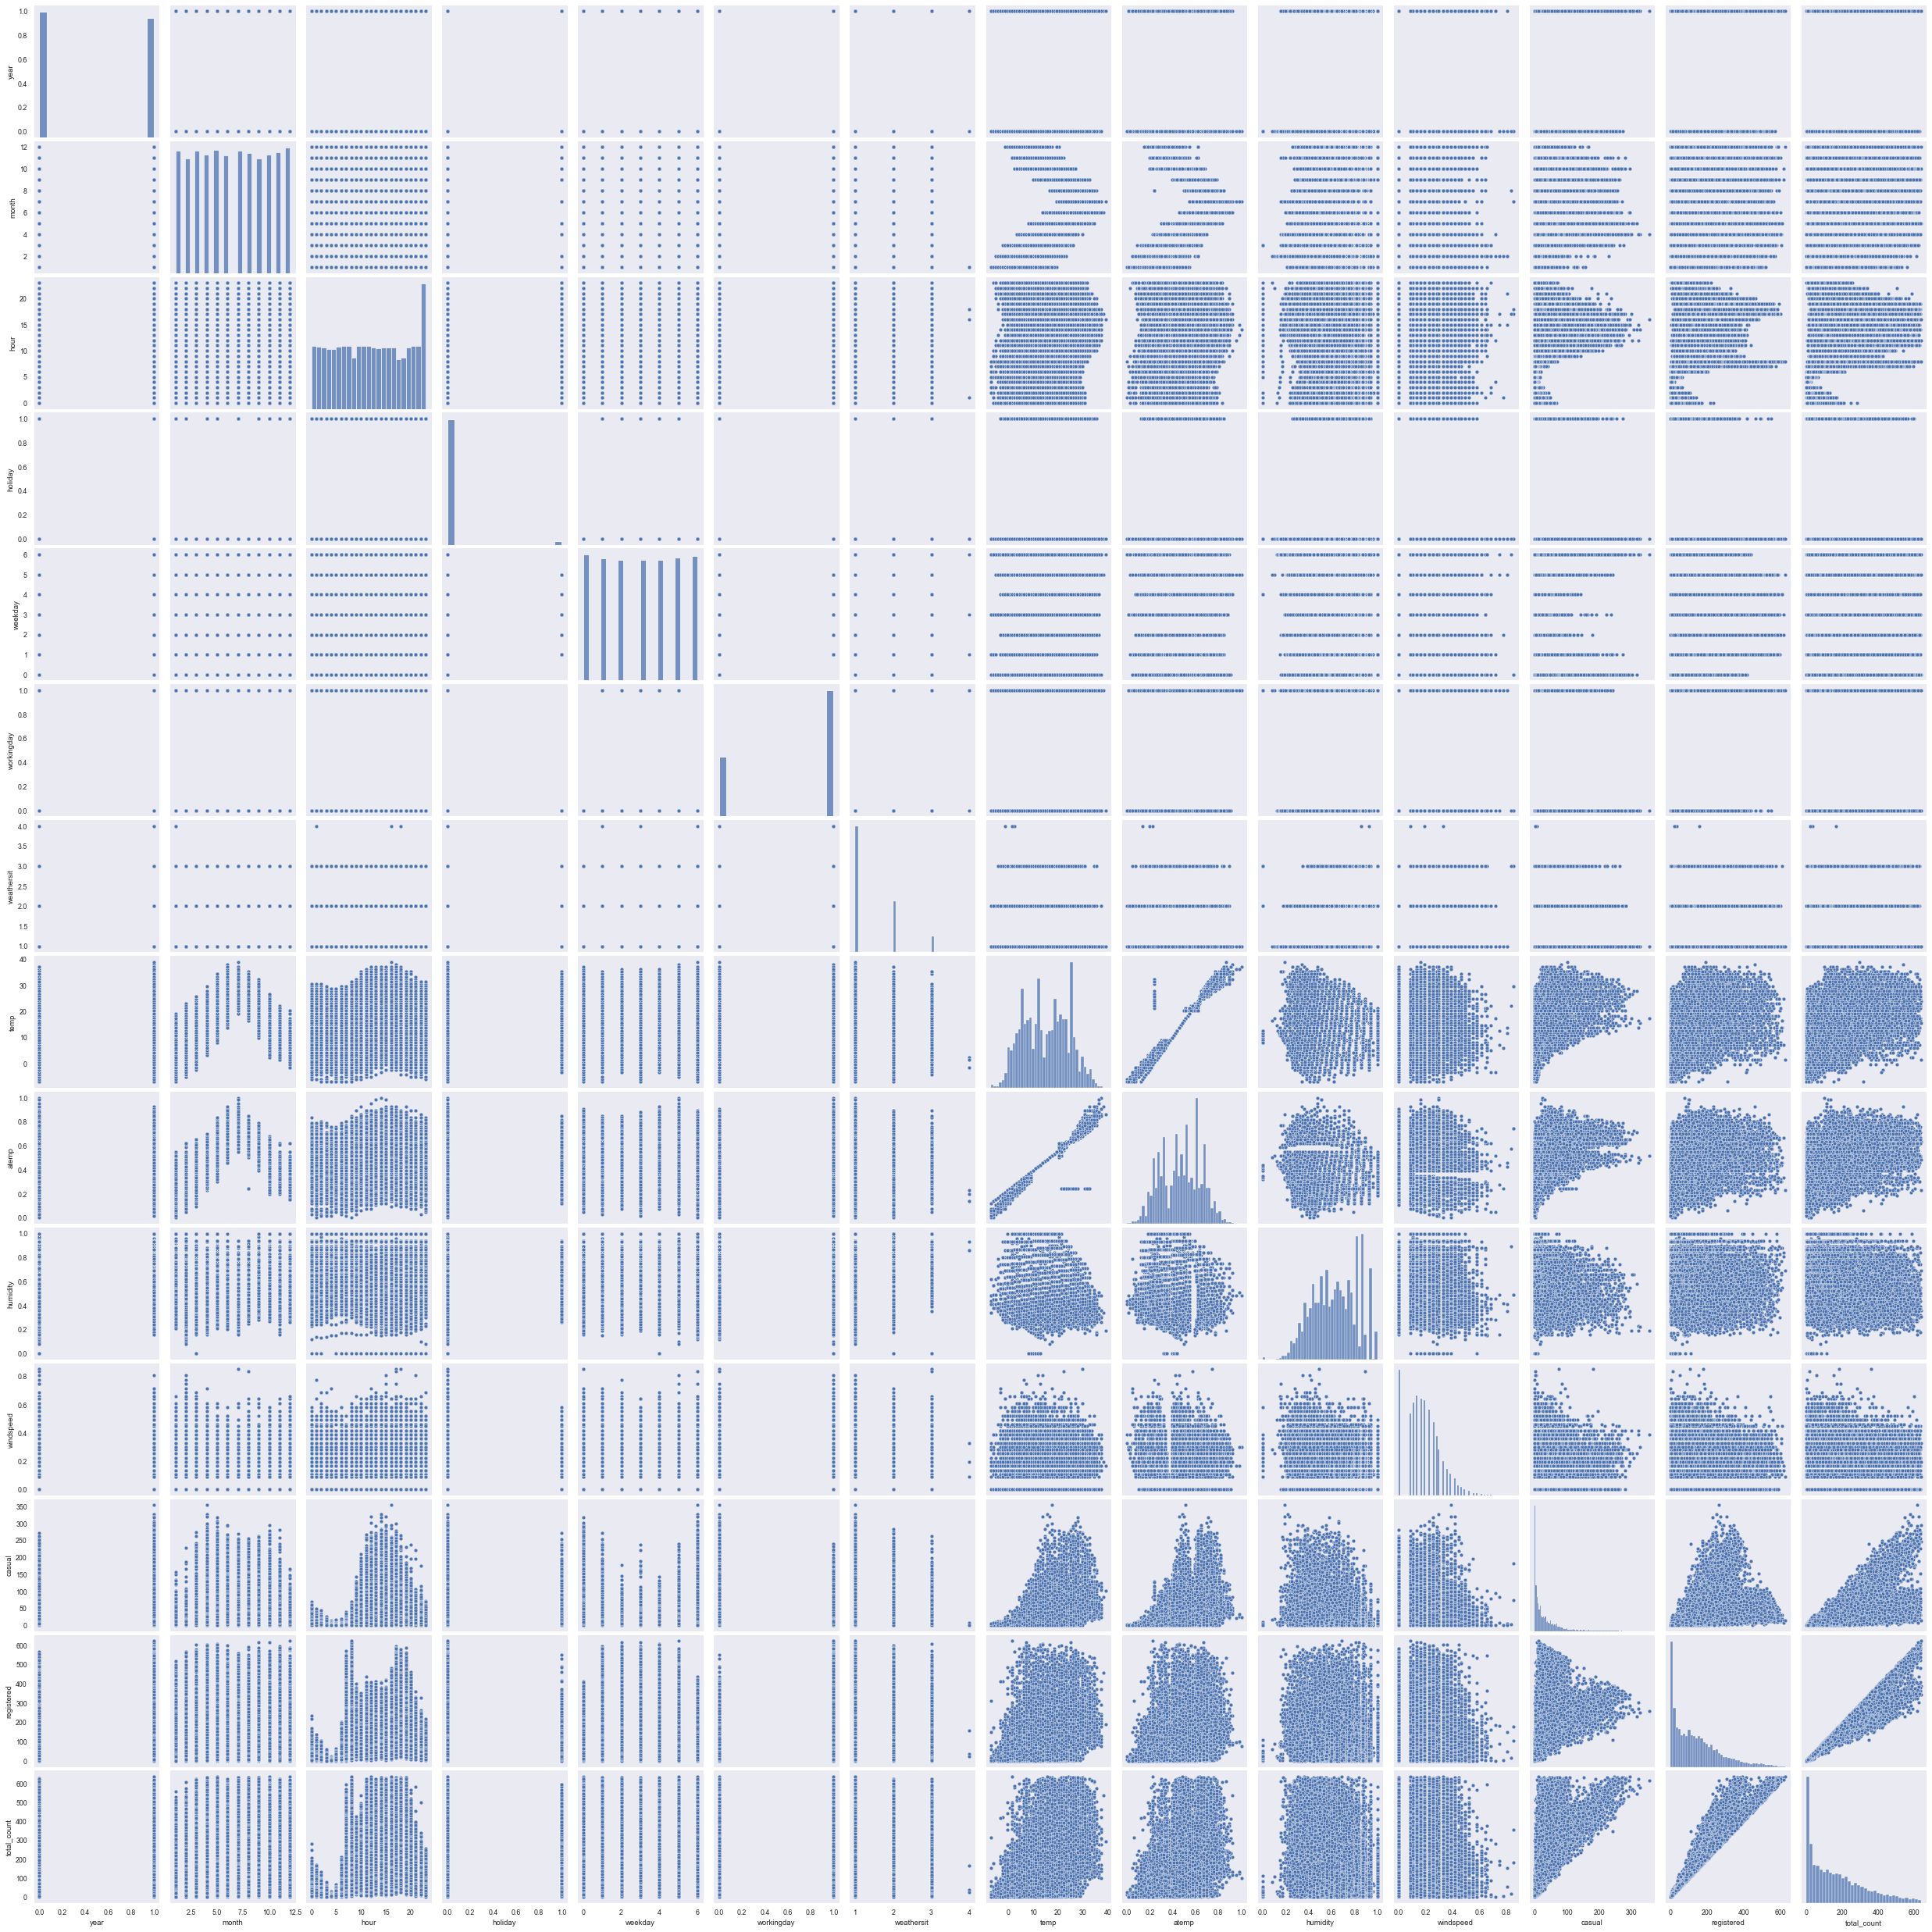

In [180]:
sns.pairplot(hdf);

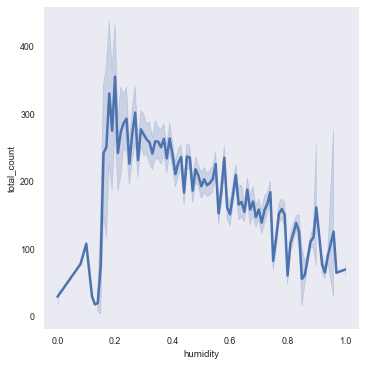

In [181]:
sns.relplot( x =  'humidity', y = 'total_count', kind = 'line' ,data = hdf );


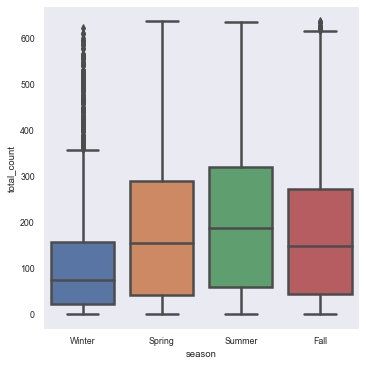

In [182]:
sns.catplot( x =  'season', y = 'total_count', kind = 'box' ,data = hdf );


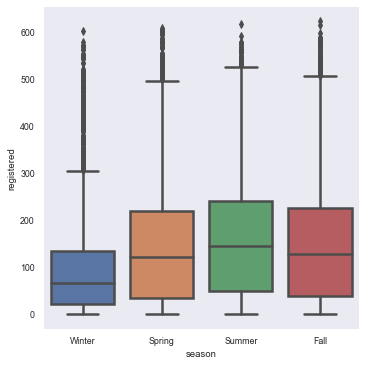

In [183]:
sns.catplot( x =  'season', y = 'registered', kind = 'box' ,data = hdf );


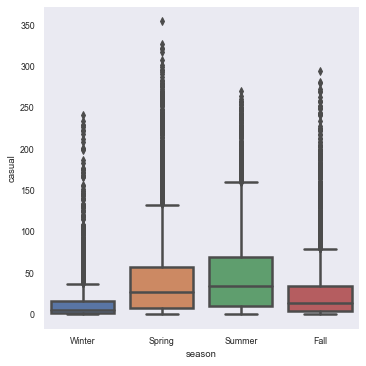

In [184]:
sns.catplot( x =  'season', y = 'casual', kind = 'box' ,data = hdf );


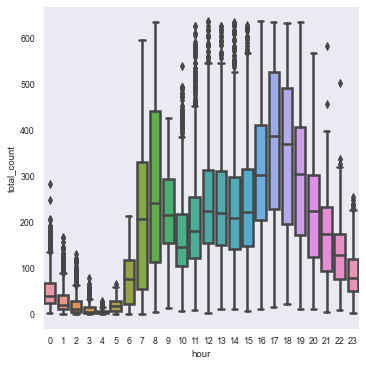

In [185]:
sns.catplot( x =  'hour', y = 'total_count', kind = 'box' ,data = hdf );


In [186]:
#rush hour between 7-9 and 16 - 19

In [187]:
hdf.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count', 'is_holiday', 'tmp_lvl'],
      dtype='object')

Splitting the features in 3 groups:

Temporal Features
 'dteday', 'season', 'year', 'month', 'hour', 'holiday','weekday', 'workingday', 'is_holiday'

Climate Features
'weathersit', 'temp', 'atemp', 'humidity','windspeed',

User
'registered', 'casual', 


Dependent Variable - 'total_count', 


##  Visualisation Temporal Features

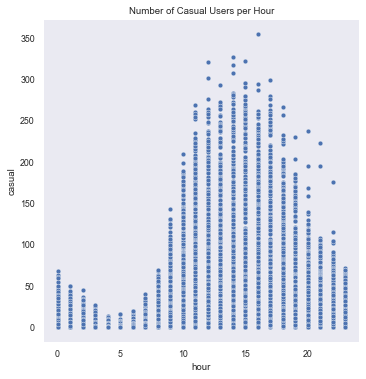

In [188]:
sns.relplot(x = 'hour', y =  'casual', data = hdf ).set(title='Number of Casual Users per Hour');

In [189]:
#casual users rent more bikes in the time frame where there are less registered users -
#between 10 - 20, from 16 - 20 the demand of casual and registered users overlap and this is a possible supply shortage

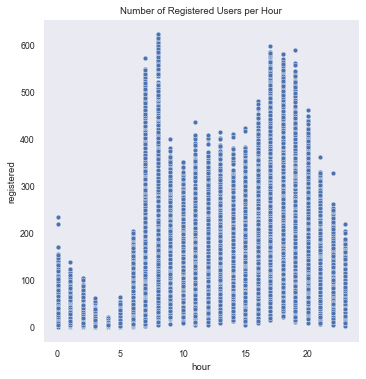

In [190]:
sns.relplot(x = 'hour', y =  'registered', data = hdf ).set(title='Number of Registered Users per Hour');

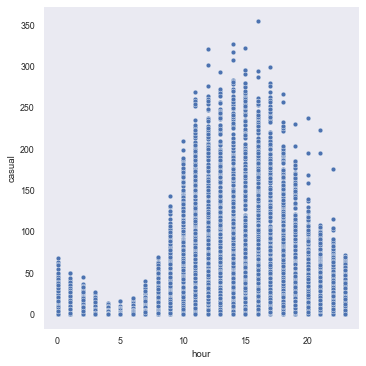

In [191]:
sns.relplot(x = 'hour', y =  'casual', data = hdf );

In [192]:
#registered users rent more bikes in the time frame where there are less casual users -
#between 7 - 9 and between 16 - 19

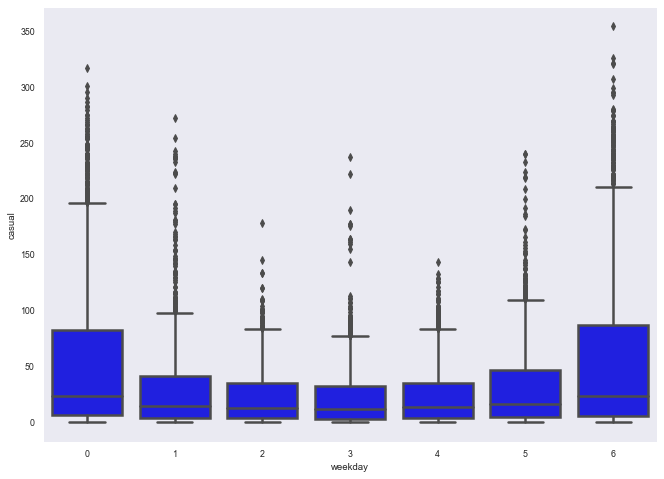

In [193]:
sns.boxplot(x = 'weekday', y =  'casual', data = hdf, color = "blue" );

In [194]:
#casual users rent more bikes on sat - mon and less during the week

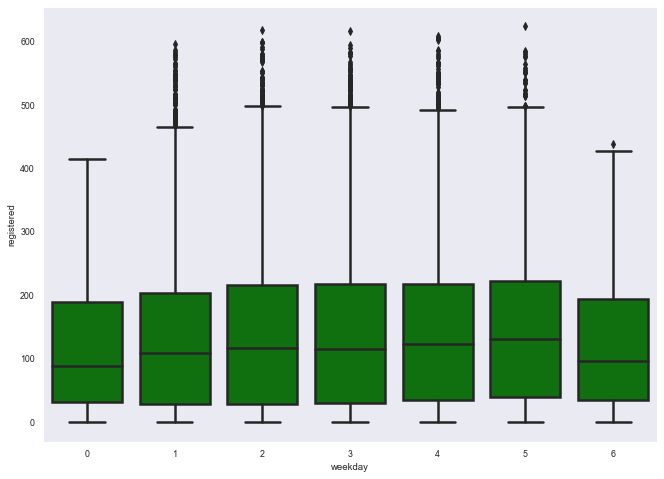

In [195]:
sns.boxplot(x = 'weekday', y =  'registered', data = hdf, color = "green" );

In [196]:
!pip3 install plotly

You should consider upgrading via the '/Users/charliesmooth/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [202]:
import plotly.express as px


In [207]:
fig = px.bar(hdf, x = 'weekday', y =  'registered')


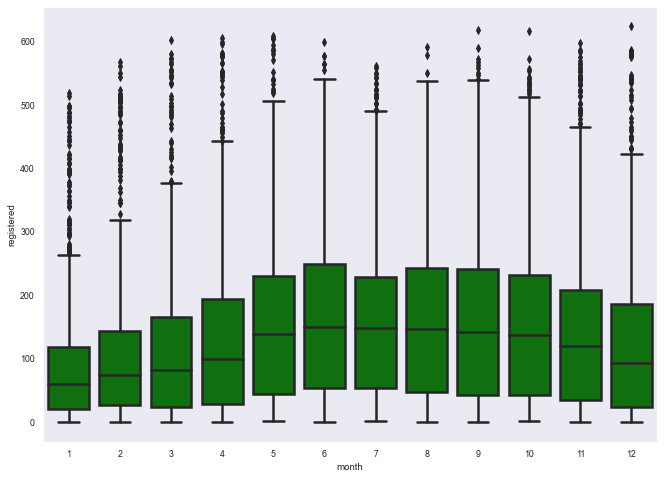

In [211]:
sns.boxplot(x = 'month', y =  'registered', data = hdf, color = "green" );

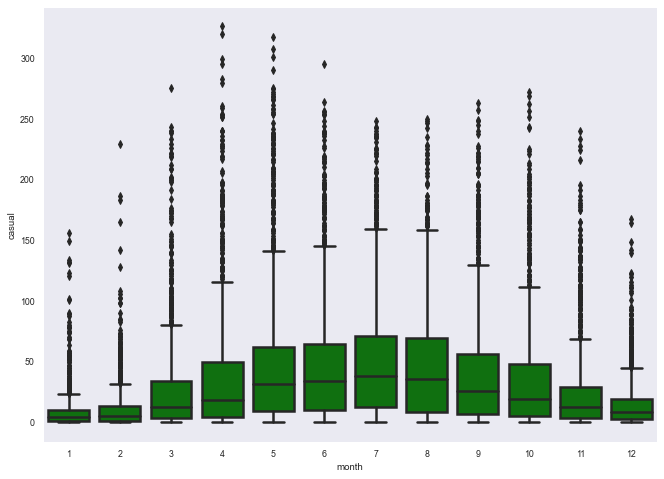

In [136]:
sns.boxplot(x = 'month', y =  'casual', data = hdf, color = "green" );

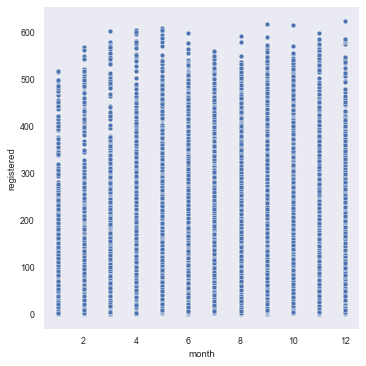

In [57]:
sns.relplot(x = 'month', y =  'registered', data = hdf );

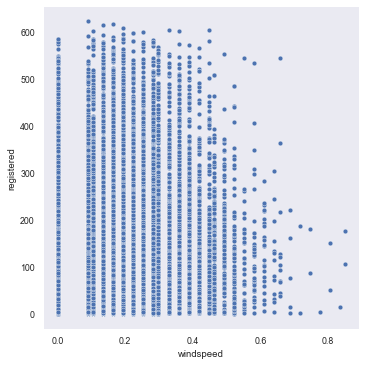

In [210]:
sns.relplot(x = 'windspeed', y =  'registered', data = hdf );

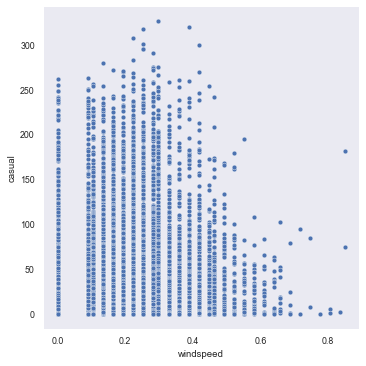

In [117]:
sns.relplot(x = 'windspeed', y =  'casual', data = hdf );

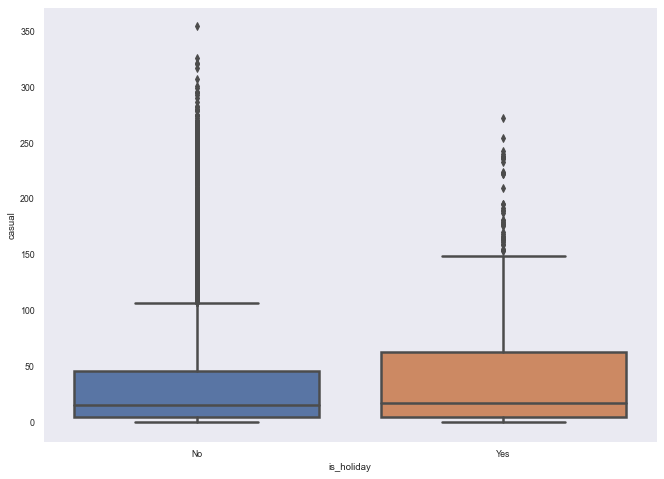

In [58]:
sns.boxplot(x = 'is_holiday', y =  'casual', data = hdf );

In [59]:
#casual users demand is higher on holidays

In [60]:
#q1 = hdf.total_count.quantile(0.25)
#q3 = hdf.total_count.quantile(0.75)
#iqr = q3 - q1
#lower_bound = q1 -(1.5 * iqr)
#upper_bound = q3 +(1.5 * iqr)
#hdf = hdf.loc[(hdf.total_count >= lower_bound) & (hdf.total_count <= upper_bound)]

In [61]:
#How to make iqr for is holiday and compare by user type

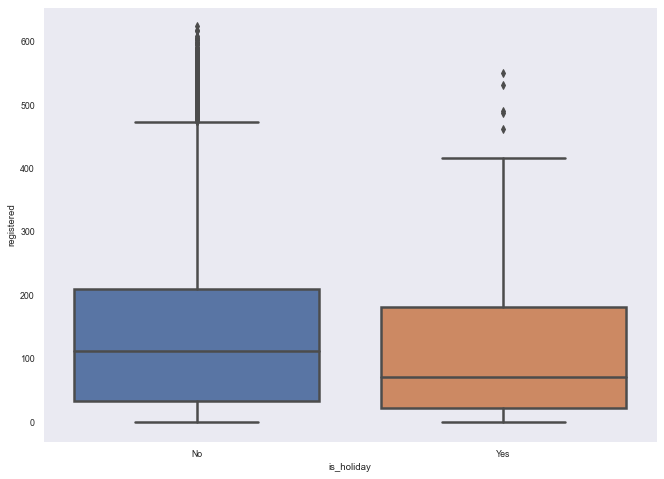

In [62]:
sns.boxplot(x = 'is_holiday', y =  'registered', data = hdf );

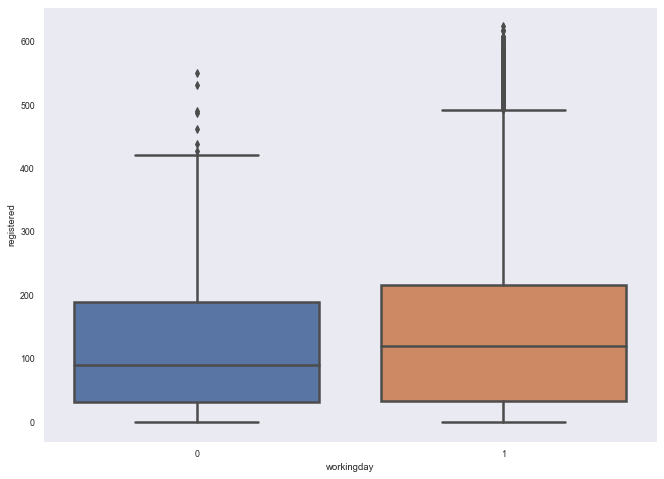

In [63]:
sns.boxplot(x = 'workingday', y =  'registered', data = hdf );   

In [64]:
#are these the same graphics

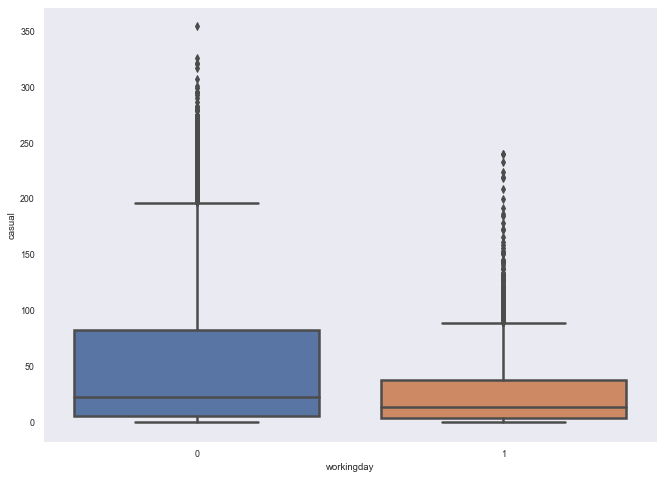

In [65]:
sns.boxplot(x = 'workingday', y =  'casual', data = hdf );   

In [66]:
#sns.relplot(x = 'quality', y =  'alcohol', col = 'wine_type', kind = 'line' ,data = wines );


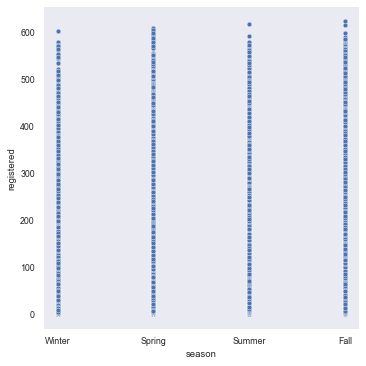

In [67]:
sns.relplot(x = 'season', y =  'registered', data = hdf );

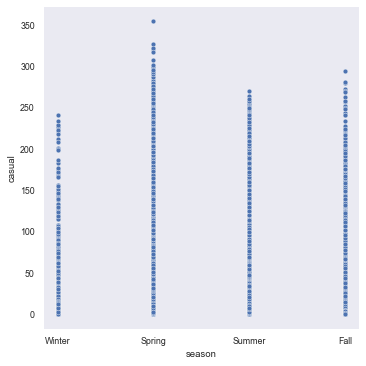

In [68]:
sns.relplot(x = 'season', y =  'casual', data = hdf );

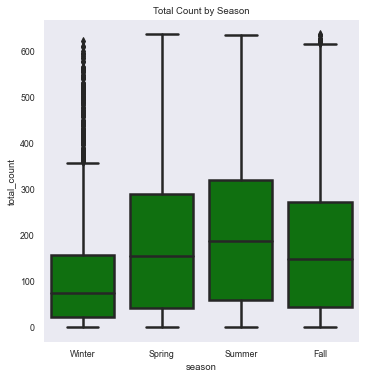

In [218]:
sns.catplot( x =  'season', y = 'total_count', kind = 'box' ,data = hdf, color = "green" ).set(title = 'Total Count by Season');























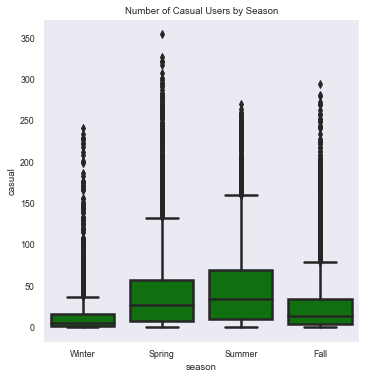

In [217]:
sns.catplot( x =  'season', y = 'casual', kind = 'box', data = hdf, color = "green").set(title = 'Number of Casual Users by Season');


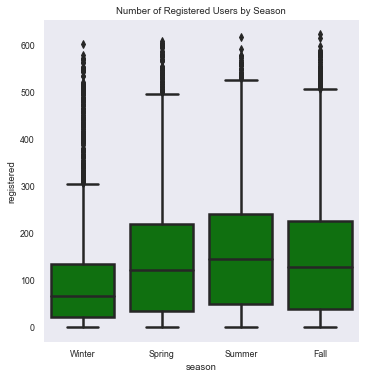

In [219]:
sns.catplot( x =  'season', y = 'registered', kind = 'box' ,data = hdf, color = "green" ).set(title = 'Number of Registered Users by Season');


In [72]:
#how many casual users are there in the summer, hdf, summer, casual users count

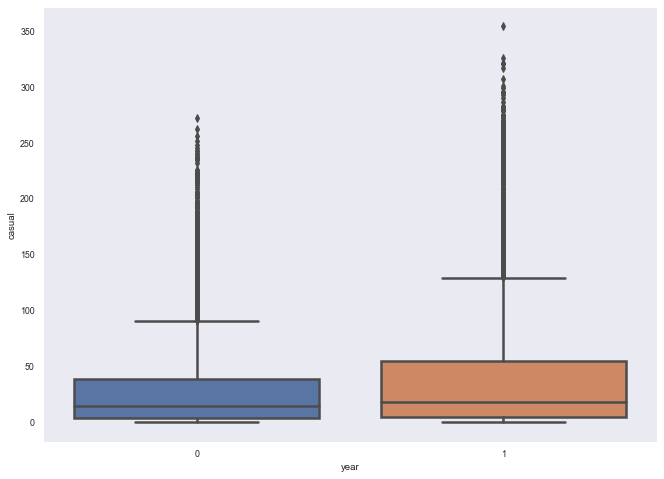

In [213]:
sns.boxplot(x = 'year', y =  'casual', data = hdf );

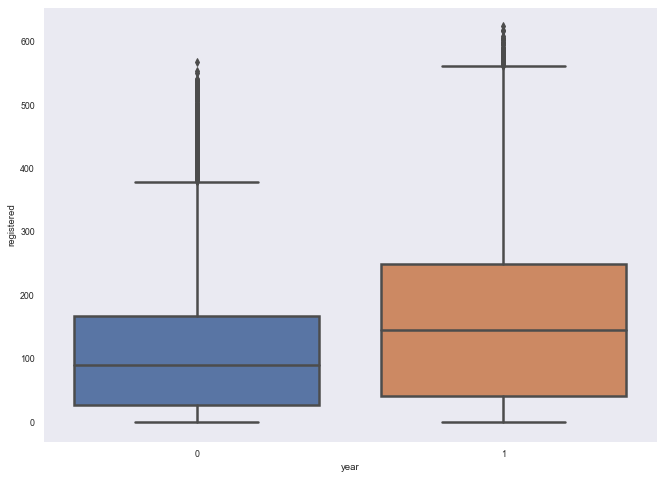

In [215]:
sns.boxplot(x = 'year', y =  'registered', data = hdf );

# Climate Features

In [73]:
hdf.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count', 'is_holiday', 'tmp_lvl'],
      dtype='object')

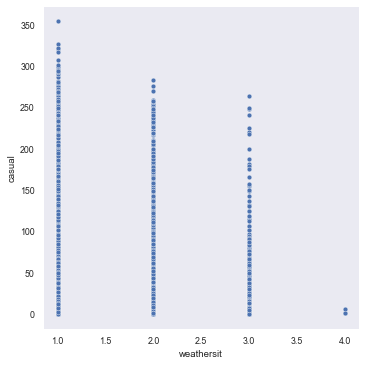

In [74]:
sns.relplot(x = 'weathersit', y =  'casual', data = hdf );   

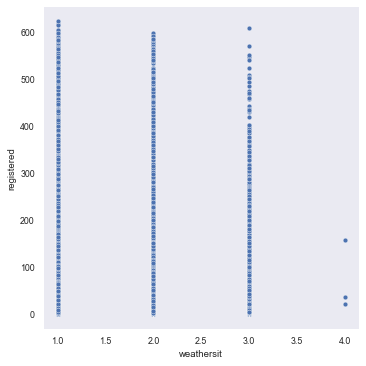

In [75]:
sns.relplot(x = 'weathersit', y =  'registered', data = hdf );   

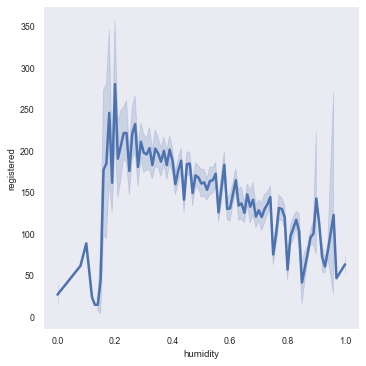

In [76]:
sns.relplot(x = 'humidity', y =  'registered', data = hdf, kind = 'line' );   

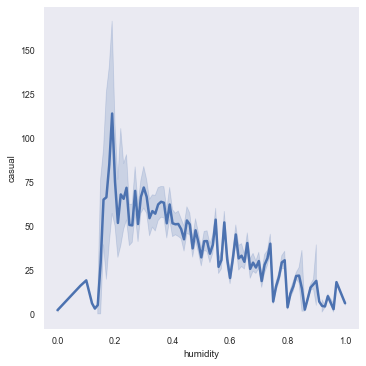

In [77]:
sns.relplot(x = 'humidity', y =  'casual', data = hdf, kind = 'line' );   

'windspeed'

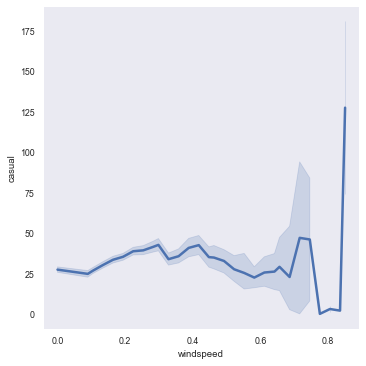

In [78]:
 sns.relplot(x = 'windspeed', y =  'casual', data = hdf, kind = 'line' );       'windspeed'

'windspeed'

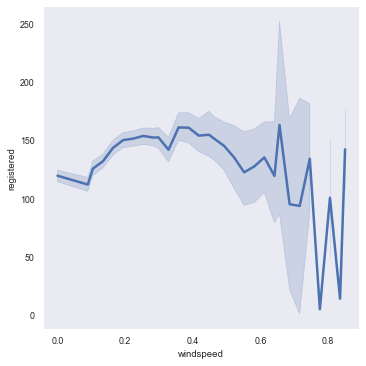

In [79]:
 sns.relplot(x = 'windspeed', y =  'registered', data = hdf, kind = 'line' );       'windspeed'

In [80]:
hdf['total_count'].max()


637

In [81]:
hdf['total_count'].min()


1

In [82]:
 hdf['total_count'].mean()


172.10022549252315

In [83]:
hdf['total_count'].mode()


0    5
dtype: int64

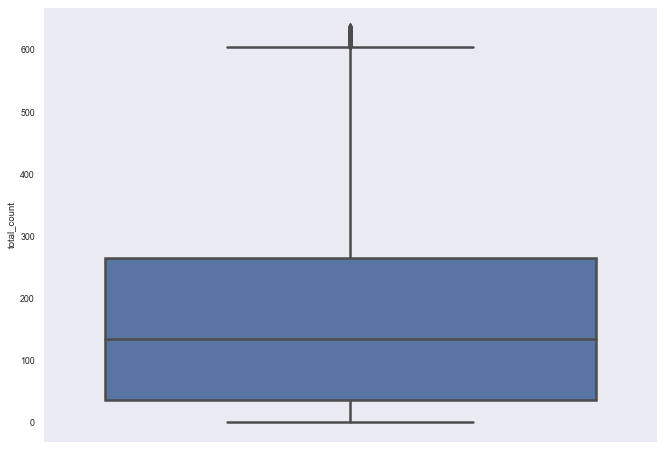

In [84]:
ax = sns.boxplot( y='total_count', data=hdf, order=["registered", "casual"])

In [85]:
hdf.temp = hdf.temp*47 - 8

In [86]:
hdf.temp


instant
1        146.16
2        101.98
3        101.98
4        146.16
5        146.16
          ...  
17375    190.34
17376    190.34
17377    190.34
17378    190.34
17379    190.34
Name: temp, Length: 16852, dtype: float64

In [87]:
hdf.temp.min()

-339.82

In [88]:
hdf.temp.max()

1825.0

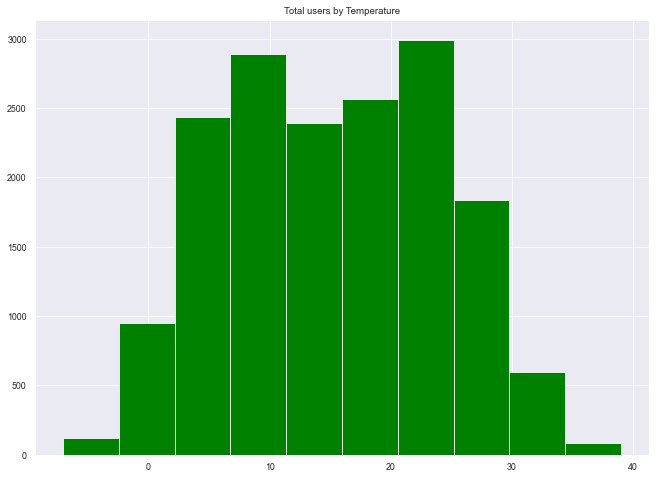

In [220]:
hdf.temp.hist(color = "green").set(title = 'Total users by Temperature');

<AxesSubplot:xlabel='temp', ylabel='Count'>

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



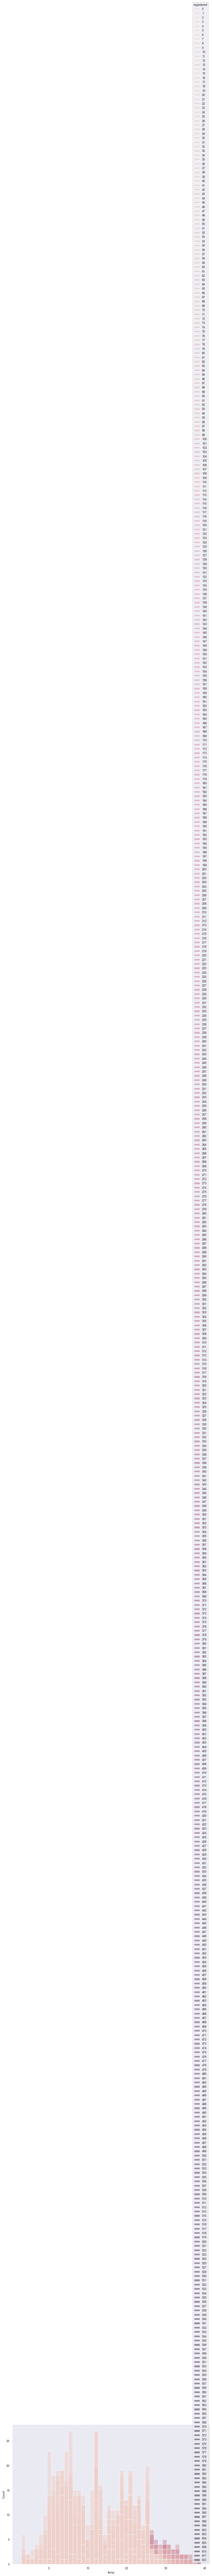

In [224]:
sns.histplot(data=hdf, x = 'temp', hue = 'registered')


In [90]:
q1 = hdf.total_count.quantile(0.25)
q3 = hdf.total_count.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
hdf = hdf.loc[(hdf.total_count >= lower_bound) & (hdf.total_count <= upper_bound)]

In [91]:
iqr

227.25

In [92]:
q1

37.0

In [93]:
q3

264.25

In [94]:
hdf.temp


instant
1        146.16
2        101.98
3        101.98
4        146.16
5        146.16
          ...  
17375    190.34
17376    190.34
17377    190.34
17378    190.34
17379    190.34
Name: temp, Length: 16734, dtype: float64

In [95]:
hdf.temp.max()


1825.0

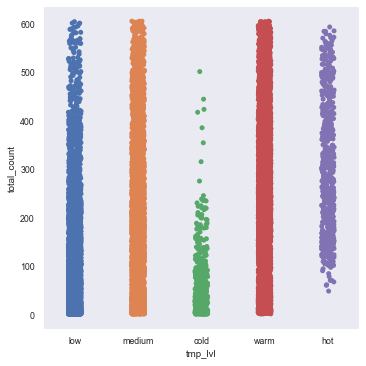

In [96]:
sns.catplot(x = 'tmp_lvl', y = 'total_count', data = hdf);

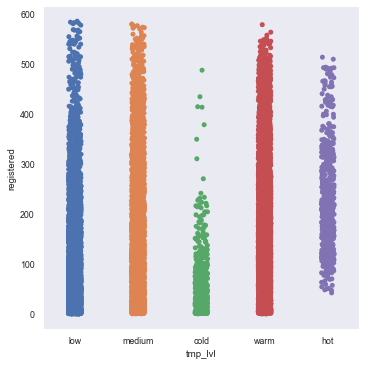

In [97]:
sns.catplot(x = 'tmp_lvl', y = 'registered', data = hdf);

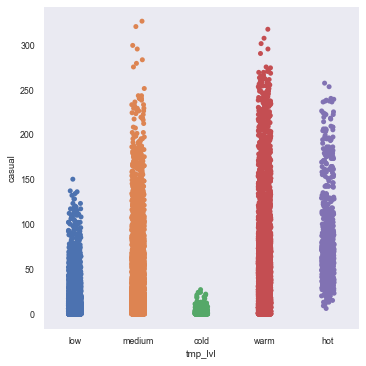

In [98]:
sns.catplot(x = 'tmp_lvl', y = 'casual', data = hdf);

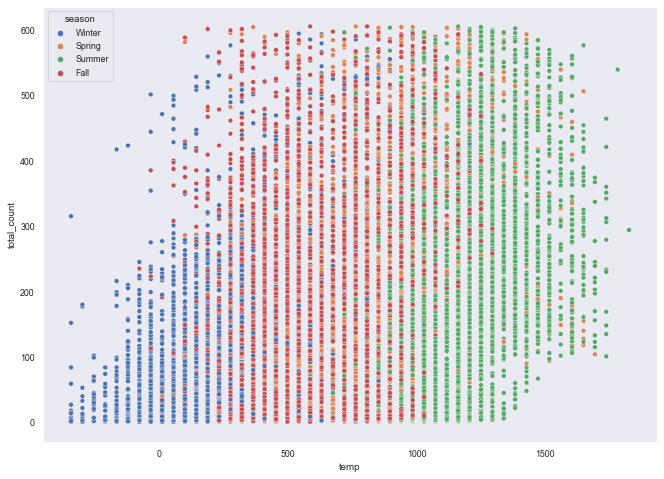

In [99]:
sns.scatterplot(x = 'temp', y = 'total_count', data = hdf, hue = 'season');

In [100]:
hdf.loc[(hdf['weekday'] < 6) & (hdf['weekday'] > 0), 'is_weekend'] = 'No'
hdf.loc[(hdf['weekday'] == 0) | (hdf['weekday'] == 6), 'is_weekend'] = 'Yes'

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [101]:
hdf

date  season  year  month  hour  holiday  weekday  workingday  \
instant                                                                        
1        2011-01-01  Winter     0      1     0        0        6           0   
2        2011-01-01  Winter     0      1     1        0        6           0   
3        2011-01-01  Winter     0      1     2        0        6           0   
4        2011-01-01  Winter     0      1     3        0        6           0   
5        2011-01-01  Winter     0      1     4        0        6           0   
...             ...     ...   ...    ...   ...      ...      ...         ...   
17375    2012-12-31  Winter     1     12    19        0        1           1   
17376    2012-12-31  Winter     1     12    20        0        1           1   
17377    2012-12-31  Winter     1     12    21        0        1           1   
17378    2012-12-31  Winter     1     12    22        0        1           1   
17379    2012-12-31  Winter     1     12    23        0        1           1   

         weathersit    temp   atemp  humidity  windspeed  casual  registered  \
instant                                                                        
1                 1  146.16  0.2879      0.81     0.0000       3          13   
2                 1  101.98  0.2727      0.80     0.0000       8          32   
3                 1  101.98  0.2727      0.80     0.0000       5          27   
4                 1  146.16  0.2879      0.75     0.0000       3          10   
5                 1  146.16  0.2879      0.75     0.0000       0           1   
...             ...     ...     ...       ...        ...     ...         ...   
17375             2  190.34  0.2576      0.60     0.1642      11         108   
17376             2  190.34  0.2576      0.60     0.1642       8          81   
17377             1  190.34  0.2576      0.60     0.1642       7          83   
17378             1  190.34  0.2727      0.56     0.1343      13          48   
17379             1  190.34  0.2727      0.65     0.1343      12          37   

         total_count is_holiday tmp_lvl is_weekend  
instant                                             
1                 16         No     low        Yes  
2                 40         No     low        Yes  
3                 32         No     low        Yes  
4                 13         No     low        Yes  
5                  1         No     low        Yes  
...              ...        ...     ...        ...  
17375            119         No     low         No  
17376             89         No     low         No  
17377             90         No     low         No  
17378             61         No     low         No  
17379             49         No     low         No  

[16734 rows x 19 columns]

In [102]:
#hdf = hdf[np.abs(hdf["total_count"]-hdf["total_count"].mean()) <= 3*hdf["total_count"].std()]


In [103]:
hdf

date  season  year  month  hour  holiday  weekday  workingday  \
instant                                                                        
1        2011-01-01  Winter     0      1     0        0        6           0   
2        2011-01-01  Winter     0      1     1        0        6           0   
3        2011-01-01  Winter     0      1     2        0        6           0   
4        2011-01-01  Winter     0      1     3        0        6           0   
5        2011-01-01  Winter     0      1     4        0        6           0   
...             ...     ...   ...    ...   ...      ...      ...         ...   
17375    2012-12-31  Winter     1     12    19        0        1           1   
17376    2012-12-31  Winter     1     12    20        0        1           1   
17377    2012-12-31  Winter     1     12    21        0        1           1   
17378    2012-12-31  Winter     1     12    22        0        1           1   
17379    2012-12-31  Winter     1     12    23        0        1           1   

         weathersit    temp   atemp  humidity  windspeed  casual  registered  \
instant                                                                        
1                 1  146.16  0.2879      0.81     0.0000       3          13   
2                 1  101.98  0.2727      0.80     0.0000       8          32   
3                 1  101.98  0.2727      0.80     0.0000       5          27   
4                 1  146.16  0.2879      0.75     0.0000       3          10   
5                 1  146.16  0.2879      0.75     0.0000       0           1   
...             ...     ...     ...       ...        ...     ...         ...   
17375             2  190.34  0.2576      0.60     0.1642      11         108   
17376             2  190.34  0.2576      0.60     0.1642       8          81   
17377             1  190.34  0.2576      0.60     0.1642       7          83   
17378             1  190.34  0.2727      0.56     0.1343      13          48   
17379             1  190.34  0.2727      0.65     0.1343      12          37   

         total_count is_holiday tmp_lvl is_weekend  
instant                                             
1                 16         No     low        Yes  
2                 40         No     low        Yes  
3                 32         No     low        Yes  
4                 13         No     low        Yes  
5                  1         No     low        Yes  
...              ...        ...     ...        ...  
17375            119         No     low         No  
17376             89         No     low         No  
17377             90         No     low         No  
17378             61         No     low         No  
17379             49         No     low         No  

[16734 rows x 19 columns]

In [104]:
#pd.melt(hdf, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index=True)[source]

In [105]:
hdf['casual'].sum()

544778

In [106]:
hdf['registered'].sum()

2282264

In [108]:
hdf.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total_count', 'is_holiday', 'tmp_lvl',
       'is_weekend'],
      dtype='object')

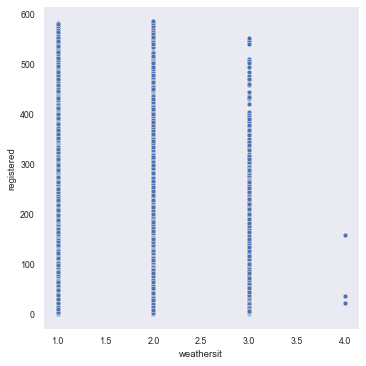

In [109]:
sns.relplot(x = 'weathersit', y =  'registered', data = hdf );  

In [110]:


hdf.hour = hdf.hour.astype('str')

hdf['hour']=hdf['hour'].apply(lambda x: '{0:0>2}'.format(x))
hdf.loc[:,'timestamp'] = hdf['date'] + ' ' + hdf['hour']
hdf['timestamp'] = pd.to_datetime(hdf['timestamp'], format = '%Y-%m-%d %H')
hdf['timestamp']
#hdf['hour'] = pd.to_datetime(df['hour'], format = '%H' )


/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-110-1a4b440f70e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['hour']=hdf['hour'].apply(lambda x: '{0:0>2}'.format(x))
/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

instant
1       2011-01-01 00:00:00
2       2011-01-01 01:00:00
3       2011-01-01 02:00:00
4       2011-01-01 03:00:00
5       2011-01-01 04:00:00
                ...        
17375   2012-12-31 19:00:00
17376   2012-12-31 20:00:00
17377   2012-12-31 21:00:00
17378   2012-12-31 22:00:00
17379   2012-12-31 23:00:00
Name: timestamp, Length: 16734, dtype: datetime64[ns]

In [111]:
hdf['registered'].sum()

2282264

In [112]:
hdf['casual'].sum()

544778

In [113]:
hdf.index = hdf.timestamp

In [114]:
hdf

date  season  year  month hour  holiday  weekday  \
timestamp                                                                     
2011-01-01 00:00:00  2011-01-01  Winter     0      1   00        0        6   
2011-01-01 01:00:00  2011-01-01  Winter     0      1   01        0        6   
2011-01-01 02:00:00  2011-01-01  Winter     0      1   02        0        6   
2011-01-01 03:00:00  2011-01-01  Winter     0      1   03        0        6   
2011-01-01 04:00:00  2011-01-01  Winter     0      1   04        0        6   
...                         ...     ...   ...    ...  ...      ...      ...   
2012-12-31 19:00:00  2012-12-31  Winter     1     12   19        0        1   
2012-12-31 20:00:00  2012-12-31  Winter     1     12   20        0        1   
2012-12-31 21:00:00  2012-12-31  Winter     1     12   21        0        1   
2012-12-31 22:00:00  2012-12-31  Winter     1     12   22        0        1   
2012-12-31 23:00:00  2012-12-31  Winter     1     12   23        0        1   

                     workingday  weathersit    temp   atemp  humidity  \
timestamp                                                               
2011-01-01 00:00:00           0           1  146.16  0.2879      0.81   
2011-01-01 01:00:00           0           1  101.98  0.2727      0.80   
2011-01-01 02:00:00           0           1  101.98  0.2727      0.80   
2011-01-01 03:00:00           0           1  146.16  0.2879      0.75   
2011-01-01 04:00:00           0           1  146.16  0.2879      0.75   
...                         ...         ...     ...     ...       ...   
2012-12-31 19:00:00           1           2  190.34  0.2576      0.60   
2012-12-31 20:00:00           1           2  190.34  0.2576      0.60   
2012-12-31 21:00:00           1           1  190.34  0.2576      0.60   
2012-12-31 22:00:00           1           1  190.34  0.2727      0.56   
2012-12-31 23:00:00           1           1  190.34  0.2727      0.65   

                     windspeed  casual  registered  total_count is_holiday  \
timestamp                                                                    
2011-01-01 00:00:00     0.0000       3          13           16         No   
2011-01-01 01:00:00     0.0000       8          32           40         No   
2011-01-01 02:00:00     0.0000       5          27           32         No   
2011-01-01 03:00:00     0.0000       3          10           13         No   
2011-01-01 04:00:00     0.0000       0           1            1         No   
...                        ...     ...         ...          ...        ...   
2012-12-31 19:00:00     0.1642      11         108          119         No   
2012-12-31 20:00:00     0.1642       8          81           89         No   
2012-12-31 21:00:00     0.1642       7          83           90         No   
2012-12-31 22:00:00     0.1343      13          48           61         No   
2012-12-31 23:00:00     0.1343      12          37           49         No   

                    tmp_lvl is_weekend           timestamp  
timestamp                                                   
2011-01-01 00:00:00     low        Yes 2011-01-01 00:00:00  
2011-01-01 01:00:00     low        Yes 2011-01-01 01:00:00  
2011-01-01 02:00:00     low        Yes 2011-01-01 02:00:00  
2011-01-01 03:00:00     low        Yes 2011-01-01 03:00:00  
2011-01-01 04:00:00     low        Yes 2011-01-01 04:00:00  
...                     ...        ...                 ...  
2012-12-31 19:00:00     low         No 2012-12-31 19:00:00  
2012-12-31 20:00:00     low         No 2012-12-31 20:00:00  
2012-12-31 21:00:00     low         No 2012-12-31 21:00:00  
2012-12-31 22:00:00     low         No 2012-12-31 22:00:00  
2012-12-31 23:00:00     low         No 2012-12-31 23:00:00  

[16734 rows x 20 columns]

In [115]:
hdf.loc['2011-01-01 00:00:00' : '2011-02-01 23:00:00',:]['total_count'].resample('T').count().reset_index()

timestamp  total_count
0     2011-01-01 00:00:00            1
1     2011-01-01 00:01:00            0
2     2011-01-01 00:02:00            0
3     2011-01-01 00:03:00            0
4     2011-01-01 00:04:00            0
...                   ...          ...
46016 2011-02-01 22:56:00            0
46017 2011-02-01 22:57:00            0
46018 2011-02-01 22:58:00            0
46019 2011-02-01 22:59:00            0
46020 2011-02-01 23:00:00            1

[46021 rows x 2 columns]